# Analyse Uber-text 

## task

1. visualate image sizes, aspect ratio -> filtering by image sizes and aspect ratio
2. visualate charetors, length -> filtering by charectors and length
3. export to pickle

## 1. Load Datas

In [1]:
!ls

Analyse-Uber-text.ipynb   Uber-text-valfiles.pkl  test	 viz_data.py
Uber-text-testfiles.pkl   load_datas.py		  train
Uber-text-trainfiles.pkl  load_test_data.py	  val


In [2]:
from glob import glob 
import matplotlib.pyplot as plt 
import numpy as np
import cv2 
import os

In [3]:
train_files = glob(os.path.join('train', '*.jpg'))
test_files = glob(os.path.join('test', '*.jpg'))
val_files = glob(os.path.join('val', '*.jpg'))
print("Train files: %d" % (len(train_files)))
print("Val files: %d" % (len(val_files)))
print("Test files: %d" % (len(test_files)))

Train files: 20794
Val files: 14901
Test files: 18022


plot samples of training data

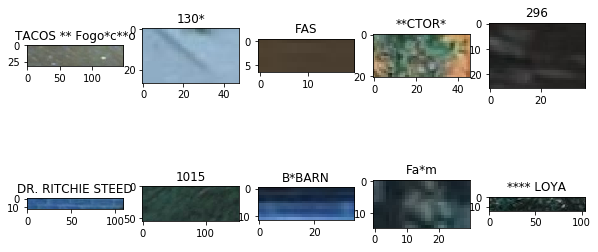

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    imgfile = train_files[i]
    img = cv2.imread(imgfile)[:, :, ::-1]
    value = imgfile.split('/')[-1][:-4]
    plt.title(value)
    plt.imshow(img)
plt.show()

There are so many noised images in train files. so that we have to use val files for training and test files for testing and validation.

In [5]:
train_files = val_files
val_files = test_files[:5000]
test_files = test_files[5000:]
print("Train files: %d" % (len(train_files)))
print("Val files: %d" % (len(val_files)))
print("Test files: %d" % (len(test_files)))

Train files: 14901
Val files: 5000
Test files: 13022


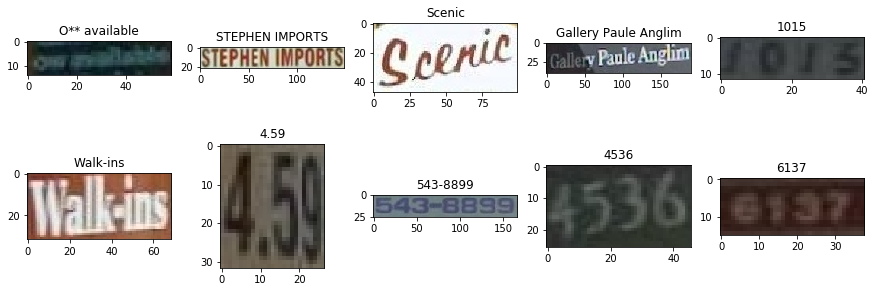

In [6]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    imgfile = train_files[i]
    img = cv2.imread(imgfile)[:, :, ::-1]
    value = imgfile.split('/')[-1][:-4]
    plt.title(value)
    plt.imshow(img)
plt.show()

## 2. Analyse(Visualate) images

### 2.1 Training images

In [7]:
train_imgsizes = [cv2.imread(imgfile).shape[:2] for imgfile in train_files]
print(len(train_imgsizes))

14901


In [8]:
train_imgsizes[0]

(14, 59)

In [9]:
train_aspects = [size[1]/size[0] for size in train_imgsizes]
len(train_aspects)

14901

In [10]:
train_heights = [imgsize[0] for imgsize in train_imgsizes]
train_widthes = [imgsize[1] for imgsize in train_imgsizes]
len(train_heights)

14901

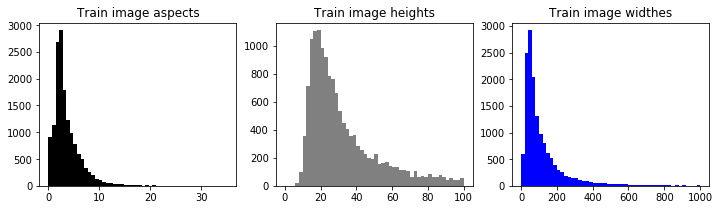

In [11]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.hist(train_aspects, bins=50, color='black')
plt.title("Train image aspects")
plt.subplot(1, 3, 2)
plt.title('Train image heights')
plt.hist(train_heights, bins=50, color='gray', range=(0, 100))
plt.subplot(1, 3, 3)
plt.title('Train image widthes')
plt.hist(train_widthes, bins=50, color='blue', range=(0, 1000))
plt.show()

filtering w > h images

In [12]:
train_normal_images = [imgfile for imgfile, size in zip(train_files, train_imgsizes) if size[1] > size[0]]
train_normal_sizes = [size for size in train_imgsizes if size[1] > size[0]]
train_normal_heights = [height for height, size in zip(train_heights, train_imgsizes) if size[1] > size[0]]
len(train_normal_images)

13696

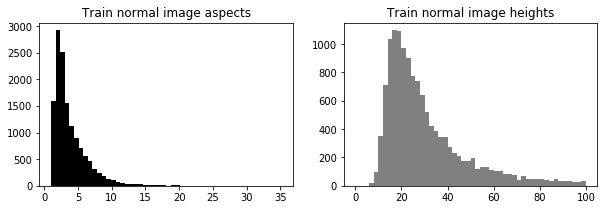

In [13]:
train_normal_aspects = [size[1]/size[0] for size in train_normal_sizes]

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.hist(train_normal_aspects, bins=50, color='black')
plt.title("Train normal image aspects")
plt.subplot(1, 2, 2)
plt.title('Train normal image heights')
plt.hist(train_normal_heights, bins=50, color='gray', range=(0, 100))
plt.show()

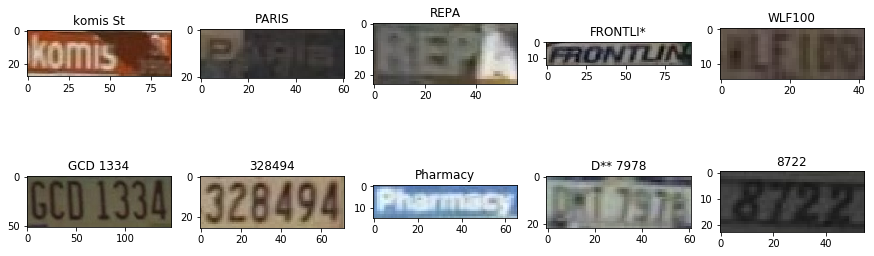

In [14]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    index = np.random.randint(0, len(train_normal_images))
    imgfile = train_normal_images[index]
    img = cv2.imread(imgfile)[:, :, ::-1]
    value = imgfile.split('/')[-1][:-4]
    plt.title(value)
    plt.imshow(img)
plt.show()

if aspect ratios have to bigger than 2, 

In [15]:
train_aspect_images = [imgfile for imgfile, aspect in zip(train_files, train_aspects) if aspect > 2]
train_aspect_heights = [height for height, aspect in zip(train_heights, train_aspects) if aspect > 2]
train_aspect_widthes = [width for width, aspect in zip(train_widthes, train_aspects) if aspect > 2]
len(train_aspect_images)

10763

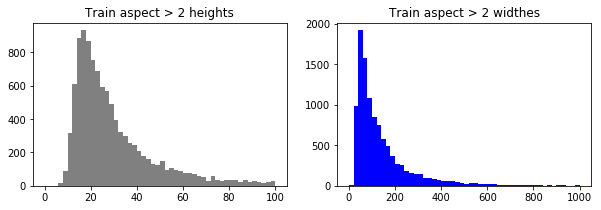

In [16]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Train aspect > 2 heights')
plt.hist(train_aspect_heights, bins=50, color='gray', range=(0, 100))
plt.subplot(1, 2, 2)
plt.title('Train aspect > 2 widthes')
plt.hist(train_aspect_widthes, bins=50, color='blue', range=(0, 1000))
plt.show()

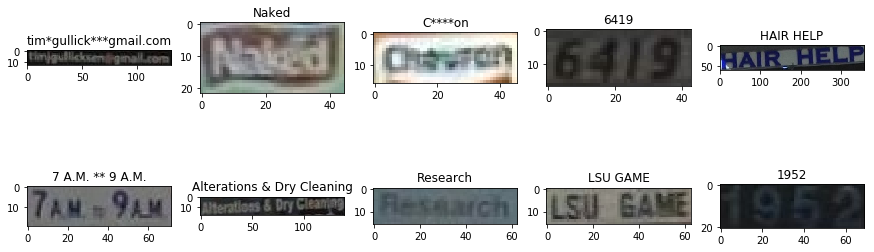

In [17]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    index = np.random.randint(0, len(train_aspect_images))
    imgfile = train_aspect_images[index]
    img = cv2.imread(imgfile)[:, :, ::-1]
    value = imgfile.split('/')[-1][:-4]
    plt.title(value)
    plt.imshow(img)
plt.show()

it's get better. And we also filtering by heights and widths(min height should be bigger than 20 and max width is 150)

In [18]:
train_aspect_height_filtered = [imgfile for imgfile, height, width in zip(train_aspect_images, train_aspect_heights, train_aspect_widthes) if height > 20 and width < 150]
train_aspect_height_filtered_heights = [height for height, width in zip(train_aspect_heights, train_aspect_widthes) if height > 20 and width < 150]
train_aspect_height_filtered_widthes = [width for height, width in zip(train_aspect_heights, train_aspect_widthes) if height > 20 and width < 150]
len(train_aspect_height_filtered)

3555

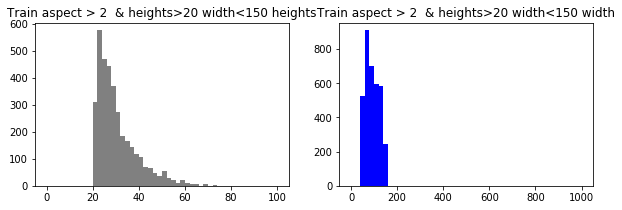

In [19]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Train aspect > 2  & heights>20 width<150 heights')
plt.hist(train_aspect_height_filtered_heights, bins=50, color='gray', range=(0, 100))
plt.subplot(1, 2, 2)
plt.title('Train aspect > 2  & heights>20 width<150 width')
plt.hist(train_aspect_height_filtered_widthes, bins=50, color='blue', range=(0, 1000))
plt.show()

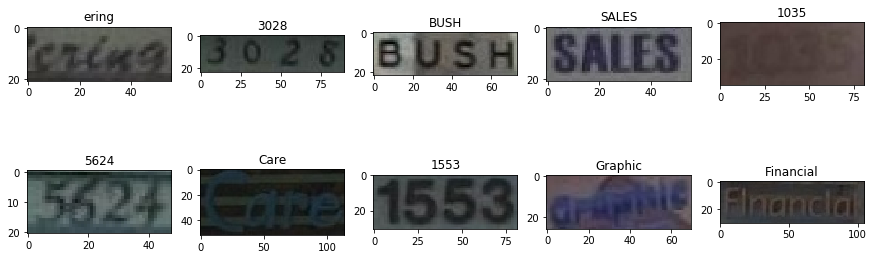

In [20]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    index = np.random.randint(0, len(train_aspect_height_filtered))
    imgfile = train_aspect_height_filtered[index]
    img = cv2.imread(imgfile)[:, :, ::-1]
    value = imgfile.split('/')[-1][:-4]
    plt.title(value)
    plt.imshow(img)
plt.show()

In [21]:
print(len(train_aspect_height_filtered))

3555


In [22]:
train_size_filtered = train_aspect_height_filtered.copy()
len(train_size_filtered)

3555

### 2.2 Test & Val images

In [23]:
test_imgsizes = [cv2.imread(imgfile).shape[:2] for imgfile in test_files]
val_imgsizes = [cv2.imread(imgfile).shape[:2] for imgfile in val_files]
print(len(test_imgsizes), len(val_imgsizes))

13022 5000


In [24]:
print(test_imgsizes[0], val_imgsizes[0])

(21, 136) (57, 13)


In [25]:
test_size_filtered = [imgfile for imgfile, size in zip(test_files, test_imgsizes) if size[1] > size[0] and size[1]/size[0] > 2 and size[0] > 20 and size[1] < 150]
val_size_filtered = [imgfile for imgfile, size in zip(val_files, val_imgsizes) if size[1] > size[0] and size[1]/size[0] > 2 and size[0] > 20 and size[1] < 150]
print(len(test_size_filtered), len(val_size_filtered))

2864 1084


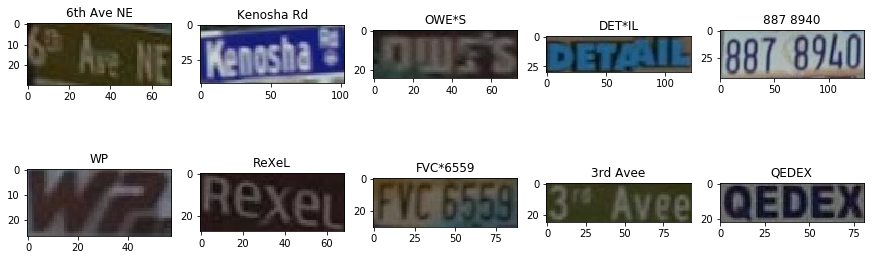

In [26]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    index = np.random.randint(0, len(test_size_filtered))
    imgfile = test_size_filtered[index]
    img = cv2.imread(imgfile)[:, :, ::-1]
    value = imgfile.split('/')[-1][:-4]
    plt.title(value)
    plt.imshow(img)
plt.show()

## 3. Analyse Charectors

In [27]:
from pprint import pprint

In [28]:
charectors = {}
for imgfiles in [train_size_filtered, val_size_filtered, test_size_filtered]:
    for imgfile in imgfiles:
        text = imgfile.split('/')[-1][:-4].lower()
        for c in text:
            charectors.setdefault(c, 0)
            charectors[c] += 1
    #pprint(charectors)
    print(len(charectors))

59
60
61


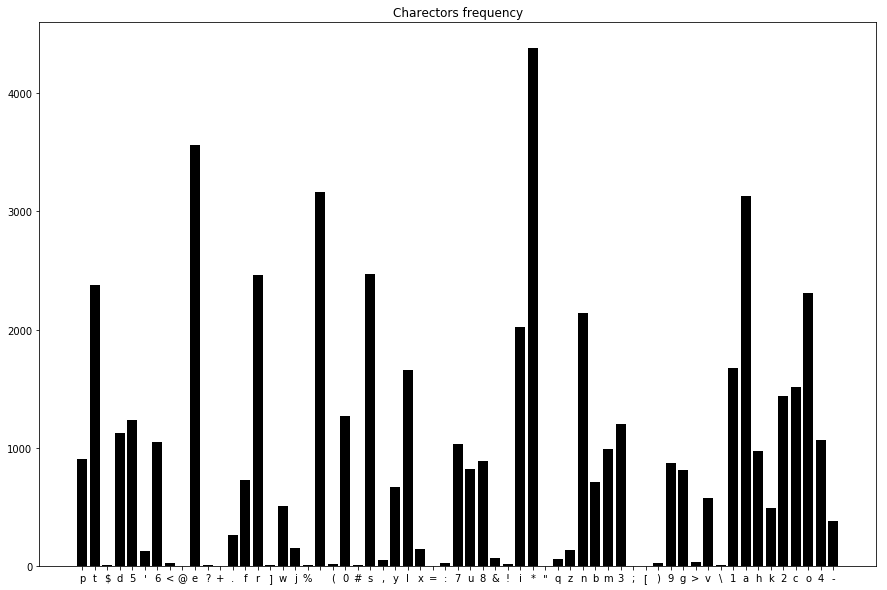

In [29]:
plt.figure(figsize=(15, 10))
chars = list(charectors.keys())
plt.title("Charectors frequency")
x = list(range(len(chars)))
plt.bar( x, list(charectors.values()), color='black' )
plt.xticks(x, chars)
plt.show()

In [30]:
black_list = [c for c in charectors if charectors[c] < 50]
print(black_list)

['$', '<', '@', '?', '+', ']', '%', '(', '#', ',', '=', ':', '!', '"', ';', '[', ')', '>', '\\']


In [31]:
cleaned_chars = {char:c for char, c in charectors.items() if char not in black_list}
pprint(cleaned_chars)
print(len(cleaned_chars))

{' ': 3164,
 '&': 69,
 "'": 124,
 '*': 4382,
 '-': 383,
 '.': 263,
 '0': 1264,
 '1': 1670,
 '2': 1437,
 '3': 1196,
 '4': 1061,
 '5': 1233,
 '6': 1046,
 '7': 1028,
 '8': 890,
 '9': 874,
 'a': 3134,
 'b': 713,
 'c': 1516,
 'd': 1126,
 'e': 3559,
 'f': 725,
 'g': 813,
 'h': 969,
 'i': 2020,
 'j': 147,
 'k': 493,
 'l': 1657,
 'm': 989,
 'n': 2138,
 'o': 2312,
 'p': 908,
 'q': 57,
 'r': 2460,
 's': 2474,
 't': 2373,
 'u': 822,
 'v': 570,
 'w': 506,
 'x': 142,
 'y': 671,
 'z': 135}
42


In [32]:
print(26+10+6)

42


In [33]:
all_chars = ''.join(np.sort( list(cleaned_chars.keys()) ))
print(all_chars)

 &'*-.0123456789abcdefghijklmnopqrstuvwxyz


In [34]:
print(all_chars[0], all_chars[1])

  &


blank is ' ' and '*'

In [35]:
train_lengths = [len(imgfile.split('/')[-1][:-4]) for imgfile in train_size_filtered]
test_lengths = [len(imgfile.split('/')[-1][:-4]) for imgfile in test_size_filtered]
val_lengths = [len(imgfile.split('/')[-1][:-4]) for imgfile in val_size_filtered]
print(len(train_lengths))

3555


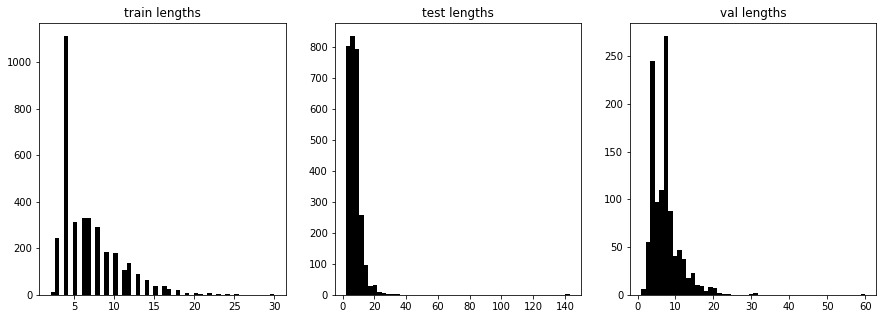

In [36]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("train lengths")
plt.hist(train_lengths, color='black', bins=50)
plt.subplot(1, 3, 2)
plt.title("test lengths")
plt.hist(test_lengths, color='black', bins=50)
plt.subplot(1, 3, 3)
plt.title("val lengths")
plt.hist(val_lengths, color='black', bins=50)
plt.show()

In [37]:
print(np.max(train_lengths), np.max(test_lengths), np.max(val_lengths))

30 143 60


## 4. Export datas

In [103]:
import pickle

We should get more training datas, so that take some datas from test and validation

In [136]:
train_datas, test_datas, val_datas = [], [], []

In [137]:
train_datas = train_size_filtered.copy()
test_datas = test_size_filtered.copy()
val_datas = val_size_filtered.copy()
print(len(train_datas), len(test_datas), len(val_datas))

3555 2864 1084


In [138]:
train_datas.extend(test_datas[:2000])
test_datas = test_datas[2000:]
train_datas.extend(val_datas[:500])
val_datas = val_datas[500:]
print(len(train_datas), len(test_datas), len(val_datas))

6055 864 584


In [135]:
with open('Uber-text-trainfiles.pkl', 'wb') as f:
    f.write(pickle.dumps(train_datas))
with open('Uber-text-testfiles.pkl', 'wb') as f:
    f.write(pickle.dumps(test_datas))
with open('Uber-text-valfiles.pkl', 'wb') as f:
    f.write(pickle.dumps(val_datas))